In [4]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('04_22.csv')
data

,Unnamed: 0,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,FTR
0,30,1.199006,-0.325458,1.672309,0.092964,0.072379,0.371667,0.741030,3.063633,-0.719519,-0.001163,-0.030735,-3.109829,1.543916,3.950040,-0.934438,H
1,31,0.459169,0.850221,-1.134070,0.545853,0.878015,-1.007148,-2.061876,0.253267,-0.719519,1.293817,-0.674108,2.663004,-0.768541,0.295855,-0.934438,H
2,32,-2.130261,-1.501137,-0.733159,-1.175124,-2.183401,-0.087938,-0.248231,-1.932574,1.150657,-1.296144,1.256011,-0.030984,0.773097,-2.546289,1.511995,H
3,33,1.199006,1.634007,0.068664,-0.178769,-0.411002,0.831272,0.741030,-0.058996,-1.966302,1.941308,-1.317481,2.278149,1.543916,-0.110165,-2.565393,H
4,34,-1.760342,-1.893029,-0.332247,-0.903391,-2.022274,-2.477883,-2.721384,-1.308048,3.020833,-0.001163,5.116251,0.738727,0.002278,-1.734247,3.958427,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,6835,-0.650587,0.066435,0.068664,0.002387,-0.088748,0.463588,0.081522,-0.278424,0.341932,-0.018663,0.369200,-0.239014,0.418937,-0.568679,1.572887,H
6296,6836,1.568924,2.025900,1.271398,-0.631657,0.394634,0.923193,-0.248231,-0.075875,-0.567883,0.453830,-0.413281,0.509894,0.856429,0.195355,-0.400564,H
6297,6837,1.938843,0.850221,1.672309,1.632786,0.716888,1.382798,0.246399,1.949614,-0.011885,2.186304,-0.674108,-1.549604,-0.581044,1.332010,-0.472847,H
6298,6838,0.829087,2.025900,-0.332247,1.179897,0.072379,1.290877,0.741030,2.000251,-0.315156,2.448800,0.004042,-1.612013,0.106443,1.317743,-0.457190,H


In [6]:
def runKFold(i, k, l):
    x = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    knn_model = model = KNeighborsClassifier(n_neighbors=i, weights = k, metric = l)
    kfold = StratifiedKFold(n_splits=17)
    X = x[0:5950]
    Y = y[0:5950]
    results = cross_val_score(knn_model, X, Y, cv=kfold)
    acc = results.mean()
    return acc

In [7]:
runKFold(250, 'distance', 'manhattan')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5295798319327731

In [8]:
def runKNN(i, k, l, m, n, o):
    x = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]
    Y = data[['FTR']]
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(Y)
    label_encoded_y = label_encoder.transform(Y)
    y = label_encoded_y
    t = (m-2004)*350
    q = (n-4)*10
    r = o*10
    x_train = x[0:t]
    y_train = y[0:t]
    x_test = x[t+q:t+r]
    y_test = y[t+q:t+r]
    model = KNeighborsClassifier(n_neighbors=i, weights = k, metric = l)
    clf_KNN = model.fit(x_train, y_train)
    y_pred_KNN = clf_KNN.predict(x_test)
    acc = accuracy_score(y_pred_KNN, y_test)
    return acc

In [9]:
runKNN(400, 'distance', 'manhattan', 2021, 4, 38)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5285714285714286

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

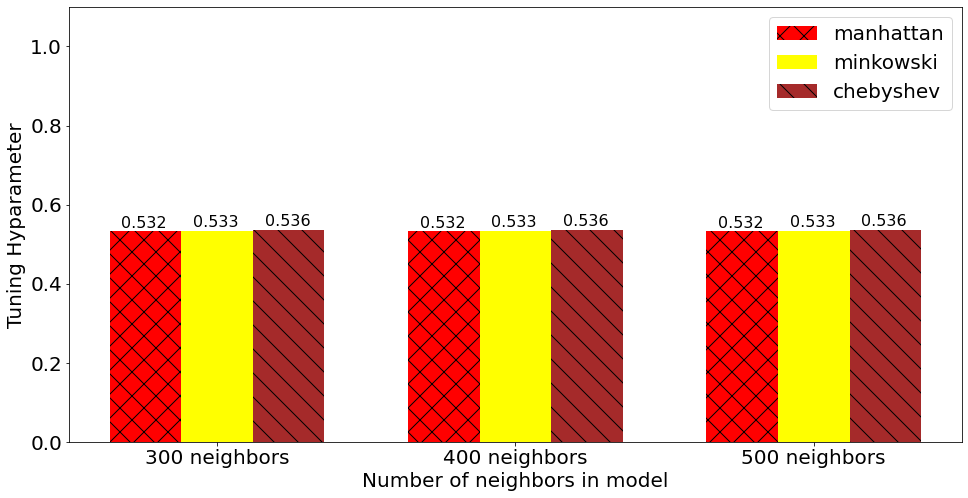

In [10]:
val_50_1_1 = runKFold(300, 'distance', 'manhattan')
val_50_1_2 = runKFold(300, 'distance', 'minkowski')
val_50_1_3 = runKFold(300, 'distance', 'chebyshev')

val_50_2_1 = runKFold(400, 'distance', 'manhattan')
val_50_2_2 = runKFold(400, 'distance', 'minkowski')
val_50_2_3 = runKFold(400, 'distance', 'chebyshev')

val_50_3_1 = runKFold(500, 'distance', 'manhattan')
val_50_3_2 = runKFold(500, 'distance', 'minkowski')
val_50_3_3 = runKFold(500, 'distance', 'chebyshev')


objects = ('300 neighbors', '400 neighbors', '500 neighbors')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn150 = [val_50_1_1, val_50_2_1, val_50_3_1]
knn200 = [val_50_1_2, val_50_2_2, val_50_3_2]
knn250 = [val_50_1_3, val_50_2_3, val_50_3_3]

for index, value in enumerate(knn150):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn200):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn250):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn150, 0.24, label = 'manhattan', color = 'red')
plt.bar(y_pos, knn200, 0.24, label = 'minkowski', color = 'yellow')
bars_linear = plt.bar(y_pos + 0.24, knn250, 0.24, label = 'chebyshev', color = 'brown')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.1])
plt.ylabel("Tuning Hyparameter")
plt.xlabel("Number of neighbors in model")
patterns = ("x", "x", "x")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('KNN2.png')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

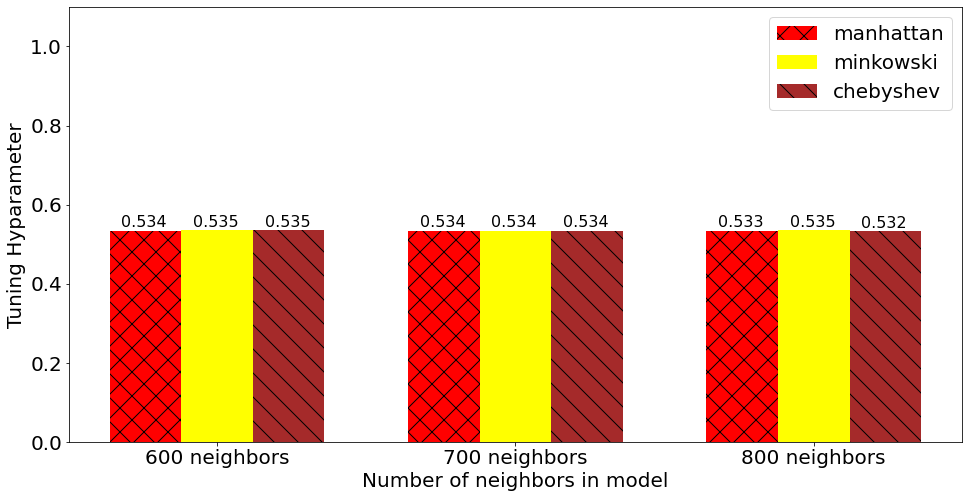

In [13]:
val_50_1_1 = runKFold(600, 'distance', 'manhattan')
val_50_1_2 = runKFold(600, 'distance', 'minkowski')
val_50_1_3 = runKFold(600, 'distance', 'chebyshev')

val_50_2_1 = runKFold(700, 'distance', 'manhattan')
val_50_2_2 = runKFold(700, 'distance', 'minkowski')
val_50_2_3 = runKFold(700, 'distance', 'chebyshev')

val_50_3_1 = runKFold(800, 'distance', 'manhattan')
val_50_3_2 = runKFold(800, 'distance', 'minkowski')
val_50_3_3 = runKFold(800, 'distance', 'chebyshev')


objects = ('600 neighbors', '700 neighbors', '800 neighbors')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn150 = [val_50_1_1, val_50_2_1, val_50_3_1]
knn200 = [val_50_1_2, val_50_2_2, val_50_3_2]
knn250 = [val_50_1_3, val_50_2_3, val_50_3_3]

for index, value in enumerate(knn150):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn200):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn250):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn150, 0.24, label = 'manhattan', color = 'red')
plt.bar(y_pos, knn200, 0.24, label = 'minkowski', color = 'yellow')
bars_linear = plt.bar(y_pos + 0.24, knn250, 0.24, label = 'chebyshev', color = 'brown')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.1])
plt.ylabel("Tuning Hyparameter")
plt.xlabel("Number of neighbors in model")
patterns = ("x", "x", "x")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('KNN2.png')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

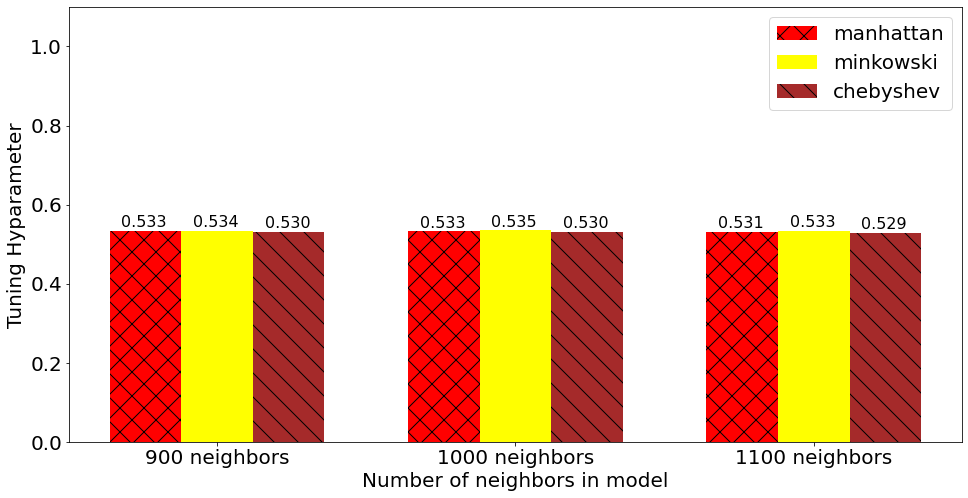

In [11]:
val_50_1_1 = runKFold(900, 'distance', 'manhattan')
val_50_1_2 = runKFold(900, 'distance', 'minkowski')
val_50_1_3 = runKFold(900, 'distance', 'chebyshev')

val_50_2_1 = runKFold(1000, 'distance', 'manhattan')
val_50_2_2 = runKFold(1000, 'distance', 'minkowski')
val_50_2_3 = runKFold(1000, 'distance', 'chebyshev')

val_50_3_1 = runKFold(1100, 'distance', 'manhattan')
val_50_3_2 = runKFold(1100, 'distance', 'minkowski')
val_50_3_3 = runKFold(1100, 'distance', 'chebyshev')


objects = ('900 neighbors', '1000 neighbors', '1100 neighbors')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn150 = [val_50_1_1, val_50_2_1, val_50_3_1]
knn200 = [val_50_1_2, val_50_2_2, val_50_3_2]
knn250 = [val_50_1_3, val_50_2_3, val_50_3_3]

for index, value in enumerate(knn150):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn200):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn250):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn150, 0.24, label = 'manhattan', color = 'red')
plt.bar(y_pos, knn200, 0.24, label = 'minkowski', color = 'yellow')
bars_linear = plt.bar(y_pos + 0.24, knn250, 0.24, label = 'chebyshev', color = 'brown')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.1])
plt.ylabel("Tuning Hyparameter")
plt.xlabel("Number of neighbors in model")
patterns = ("x", "x", "x")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('KNN2.png')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

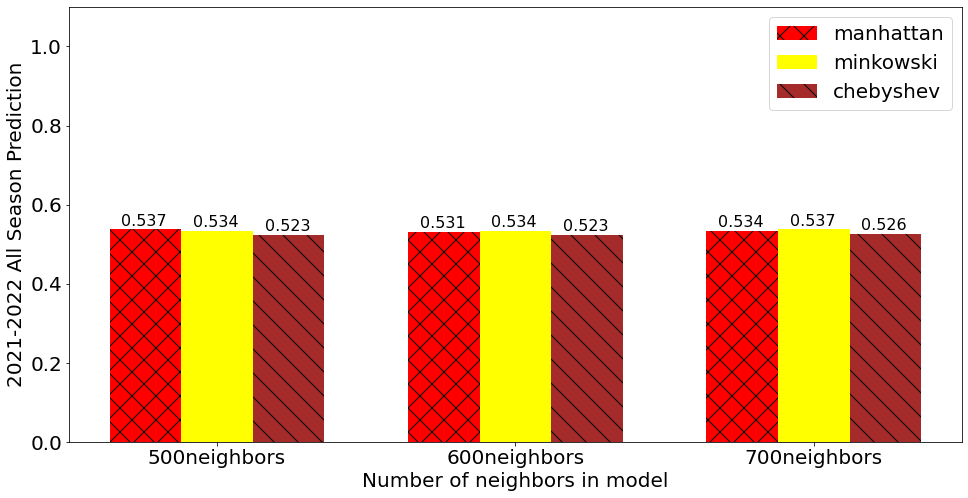

In [14]:
a=500
b=600
c=700
accuary_50_1_1 = runKNN(a, 'distance', 'manhattan', 2021, 4, 38)
accuary_50_1_2 = runKNN(a, 'distance', 'minkowski', 2021, 4, 38)
accuary_50_1_3 = runKNN(a, 'distance', 'chebyshev', 2021, 4, 38)

accuary_50_2_1 = runKNN(b, 'distance', 'manhattan', 2021, 4, 38)
accuary_50_2_2 = runKNN(b, 'distance', 'minkowski', 2021, 4, 38)
accuary_50_2_3 = runKNN(b, 'distance', 'chebyshev', 2021, 4, 38)

accuary_50_3_1 = runKNN(c, 'distance', 'manhattan', 2021, 4, 38)
accuary_50_3_2 = runKNN(c, 'distance', 'minkowski', 2021, 4, 38)
accuary_50_3_3 = runKNN(c, 'distance', 'chebyshev', 2021, 4, 38)

x1 = str(a) + '' + 'neighbors'
x2 =str(b) + '' + 'neighbors'
x3= str(c)+ '' + 'neighbors'

objects = (x1, x2, x3)
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

knn150 = [accuary_50_1_1, accuary_50_2_1, accuary_50_3_1]
knn200 = [accuary_50_1_2, accuary_50_2_2, accuary_50_3_2]
knn250 = [accuary_50_1_3, accuary_50_2_3, accuary_50_3_3]

for index, value in enumerate(knn150):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn200):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(knn250):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, knn150, 0.24, label = 'manhattan', color = 'red')
plt.bar(y_pos, knn200, 0.24, label = 'minkowski', color = 'yellow')
bars_linear = plt.bar(y_pos + 0.24, knn250, 0.24, label = 'chebyshev', color = 'brown')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1.1])
plt.ylabel("2021-2022 All Season Prediction")
plt.xlabel("Number of neighbors in model")
patterns = ("x", "x", "x")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
